In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import math
from matplotlib.colors import ListedColormap
import os
import re
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.distributions._has_statsmodels = False

In [2]:
data_arr = []
filepath_kernel = r'C:\Users\kpebe\OneDrive\Рабочий стол\Transistors\Measurements\N2O'

for root, dirs, files in os.walk(filepath_kernel):
    
    for file in files:
        
        if 'Results' in os.path.splitext(file)[0]:
            
            df = pd.read_csv(root + '\\' + file, engine = 'python', sep = ',', index_col = None)
            data_arr.append(df)
            
data = pd.concat(data_arr, axis = 0, ignore_index = True)
pd.DataFrame.to_csv(data, path_or_buf = filepath_kernel + r'\All results.csv', sep = ',', header = True, index = False)

data.dropna(inplace= True, how = 'any')
data.reset_index(inplace = True, drop = True)

In [25]:
w = []
a = []

for item in data['Chip name']:
    
    if 'N2O' in item:
    
        w.append(item.split('_')[0] + ' ' + item.split('_')[1])
        a.append('N2O')
        
    if 'Pristine' in item:
        
        w.append(item.split('_')[0])
        a.append('Pristine')

data['Type'] = a
data['Regime'] = w
data['R_on_s'] = data['R_on']/data['Lch']
data['R_off_s'] = data['R_off']/data['Lch']

In [4]:
data

,Chip name,Measurement,Status,Bias,Lch,R_on,R_off,On/off,Max mobility,Regime,R_on_s,R_off_s
0,550C_25%N2O_3min6s_60MOhm,First measurement,Operable,1.0,20.0,100708991.0,1.418319e+08,1.0,0.550,550C 25%N2O,5.035450e+06,7.091595e+06
1,550C_25%N2O_3min6s_60MOhm,First measurement,Operable,1.0,25.0,145998190.0,3.849011e+08,3.0,62.585,550C 25%N2O,5.839928e+06,1.539604e+07
2,550C_25%N2O_3min6s_60MOhm,First measurement,Operable,1.0,35.0,990226465.0,1.418802e+09,1.0,0.008,550C 25%N2O,2.829218e+07,4.053720e+07
3,550C_25%N2O_3min6s_60MOhm,First measurement,Operable,1.0,40.0,1219527.0,1.811922e+08,149.0,50.363,550C 25%N2O,3.048817e+04,4.529806e+06
4,550C_25%N2O_3min6s_60MOhm,First measurement,Operable,1.0,45.0,1111753.0,7.331056e+06,7.0,10.575,550C 25%N2O,2.470562e+04,1.629124e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
6266,Pristine_5min0s_0.32MOhm,First measurement,Operable,1.0,60.0,9980.0,3.239600e+04,3.0,295.802,Pristine,1.663333e+02,5.399333e+02
6267,Pristine_5min0s_0.32MOhm,First measurement,Operable,1.0,65.0,11182.0,3.686400e+04,3.0,268.908,Pristine,1.720308e+02,5.671385e+02
6268,Pristine_5min0s_0.32MOhm,First measurement,Operable,1.0,70.0,9861.0,3.182300e+04,3.0,365.738,Pristine,1.408714e+02,4.546143e+02
6269,Pristine_5min0s_0.32MOhm,First measurement,Operable,1.0,75.0,11601.0,4.031900e+04,3.0,328.770,Pristine,1.546800e+02,5.375867e+02


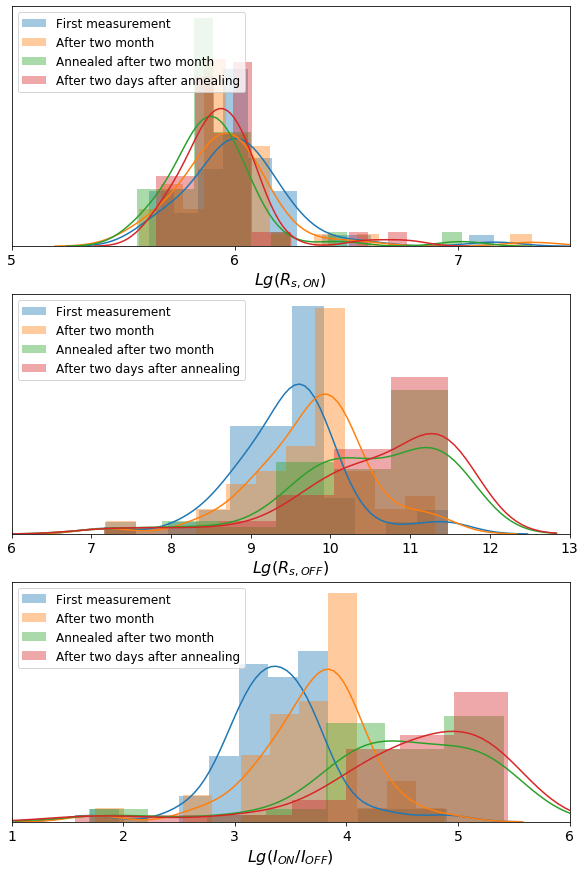

In [13]:
fig, ax = plt.subplots(3, 1, figsize = (10, 15), squeeze = True)
m = ['1st measurement', 'Before annealing', 'After annealing', 'After annealing after some time']
to_plot = ['R open', 'R closed', 'On/off']
labels = ['$Lg($$R_{s, ON})$', '$Lg($$R_{s, OFF})$', '$Lg($$I_{ON}$$/$$I_{OFF})$']
lims = [[5, 7.5], [6, 13], [1, 6]]

for i in range(3):

    sns.distplot(np.log10(data28[data28['Measurement'] == m[0]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'First measurement')
    sns.distplot(np.log10(data28[data28['Measurement'] == m[1]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'After two month')
    sns.distplot(np.log10(data28[data28['Measurement'] == m[2]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'Annealed after two month')
    sns.distplot(np.log10(data28[data28['Measurement'] == m[3]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'After two days after annealing')
    
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    
    ax[i].set_xlim(left = lims[i][0], right = lims[i][1])
    ax[0].xaxis.set_ticks([5,6,7])
    
    ax[i].yaxis.set_ticks_position('none') 
    ax[i].axes.get_yaxis().set_visible(False)

    ax[i].set_xlabel(labels[i], fontsize = 16)
    ax[i].legend(loc = 'upper left', fontsize = 12)
    
fig.savefig('Dist 28.png', format = 'png', bbox_inches = 'tight', dpi = 600)

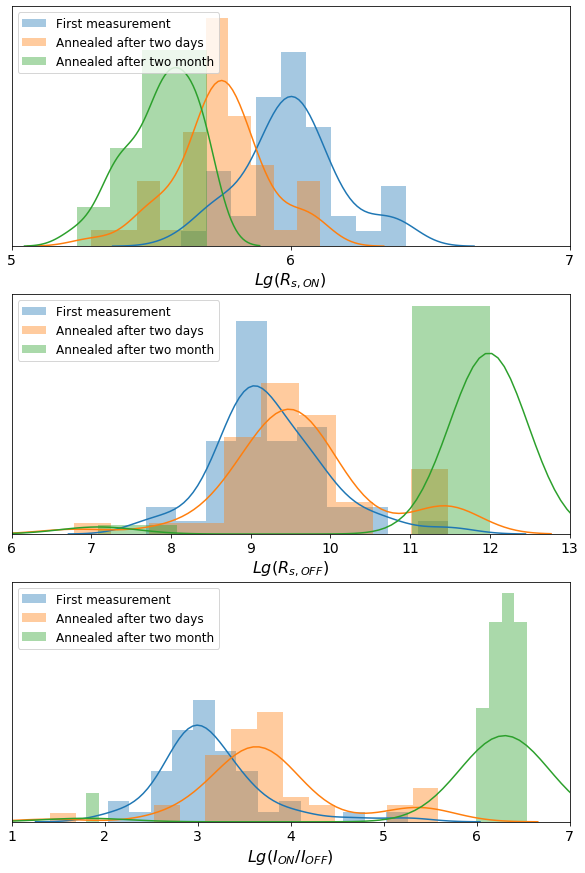

In [14]:
fig, ax = plt.subplots(3, 1, figsize = (10, 15), squeeze = True)
m = ['1st measurement', 'After annealing', 'For test not annealed']
to_plot = ['R open', 'R closed', 'On/off']
lims = [[5, 7], [6, 13], [1, 7]]

for i in range(3):

    sns.distplot(np.log10(data160[data160['Measurement'] == m[0]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'First measurement')
    sns.distplot(np.log10(data160[data160['Measurement'] == m[1]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'Annealed after two days')
    sns.distplot(np.log10(data160[data160['Measurement'] == m[2]][to_plot[i]]), 
                 ax = ax[i], rug = False, hist = True, kde = True, label = 'Annealed after two month')
    
    ax[i].set_xlim(left = lims[i][0], right = lims[i][1])
    
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    ax[i].yaxis.set_ticks_position('none') 
    ax[0].xaxis.set_ticks([5,6,7])
    ax[i].axes.get_yaxis().set_visible(False)

    ax[i].set_xlabel(labels[i], fontsize = 16)
    
    ax[i].legend(loc = 'upper left', fontsize = 12)

fig.savefig('Dist 160.png', format = 'png', bbox_inches = 'tight', dpi = 600)

In [7]:
arr1 = []
arr2 = []

data = data[data['Measurement'] == '1st measurement']
data = data[data['Bias'] == 0.3]

for item in data['Chip name']:
    
    if 'Pristine' in item:
        
        arr1.append('Pristine')
        arr2.append(float(item.split('_')[4].replace('MOhm', '')))
        
    elif 'N2O' in item:
        
        arr1.append('N2O')
        arr2.append(float(item.split('_')[4].replace('MOhm', '')))
    
#     elif 'N2O(30%' in item:
        
#         arr1.append('30 % N2O,\n1.4 lpm')
#         arr2.append(float(item.split('_')[4].replace('MOhm', '')))
        
data['CNT type'] = arr1
data['R'] = arr2

data['R open'] = data['R open']*150/data['Lch']
data['R closed'] = data['R closed']*150/data['Lch']

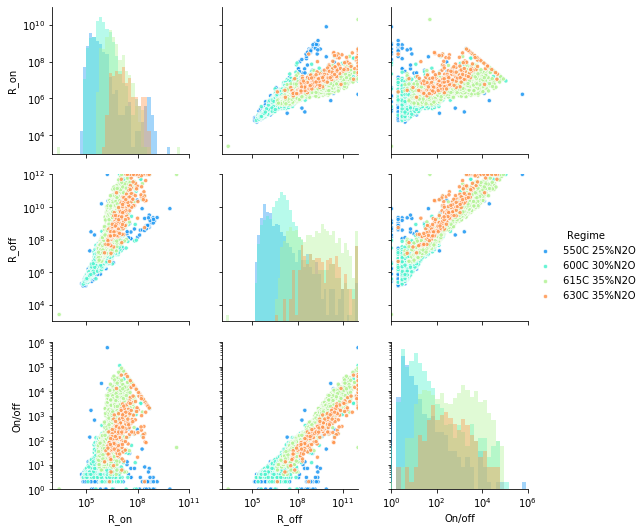

In [35]:
g = sns.pairplot(data, hue = 'Regime', diag_kind = 'hist', palette = 'rainbow', vars = ['R_on', 'R_off', 'On/off'],
                 plot_kws = {'size': 15, 'alpha' : 0.85}, diag_kws = {'alpha' : 0.4, 'log' : True, 'bins' : np.logspace(np.log10(1e-3),np.log10(1e12), 80)})
    
k = ['R_on', 'R_off', 'On/off']

for i in range(0, g.axes.shape[0]):
    
    for j in range(0, g.axes.shape[1]):
        
        if i != j:
            
            g.axes[i,j].set_xscale('log')
            g.axes[i,j].set_yscale('log')
            
            g.axes[i,j].set_xlim([10**np.floor(math.log10(np.min(data[k[j]]))),
                                  10**np.ceil(math.log10(np.max(data[k[j]])))])
            g.axes[i,j].set_ylim([10**np.floor(math.log10(np.min(data[k[i]]))),
                                  10**np.ceil(math.log10(np.max(data[k[i]])))])
            
        else:
            
            g.axes[i,j].set_xscale('log')
            g.axes[i,j].set_xlim([10**np.round(np.log10(np.min(data[k[j]]))),
                                  10**np.ceil(np.log10(np.max(data[k[j]])))])
            
plt.savefig('SuperPuper.png', dpi = 600, format = 'png')

In [38]:
def needed_shit(row):
    
    if 'Pristine' in row:
        
        return True
    
    else:
        
        return False

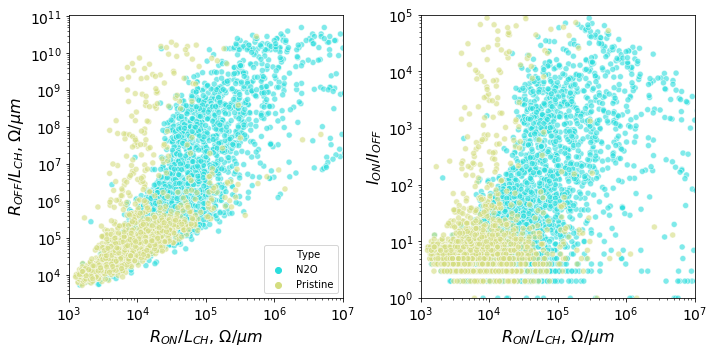

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# k = ['R open', 'R closed', 'On/off', 'Max mobility']
k = ['R_on_s', 'R_off_s', 'On/off']

ylabels = ['$R_{OFF}$/$L_{CH}$, $\Omega$/$\u03bcm$', '$I_{ON}/I_{OFF}$', '$Peak$ $mobility$, $cm^{2}V^{-1}s^{-1}$']

for i in range(2):

    sns.scatterplot(x = 'R_on_s', y = k[i + 1], data = data[data['R_on'] > 10e4],
                    hue = 'Type', palette = 'rainbow', 
                    ax = ax[i], hue_norm = mpl.colors.LogNorm(), alpha = 0.6, legend = 'full')
    
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].legend()
    ax[i].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7])
    ax[i].set_xlim(left = 1e3, right = 1e7)
    
    ax[i].tick_params(axis='both', which='both', labelsize=14)
    ax[i].set_xlabel('$R_{ON}$/$L_{CH}$, $\Omega$/$\u03bcm$', fontsize = 16)
    ax[i].set_ylabel(ylabels[i], fontsize = 16)

ax[1].get_legend().remove()
ax[1].set_ylim(bottom = 1e0, top = 1e5)
    
plt.tight_layout(pad = 1)
plt.savefig('Pristine vs N2O comparison.png', format = 'png', dpi = 600, bbox_inches = 'tight')

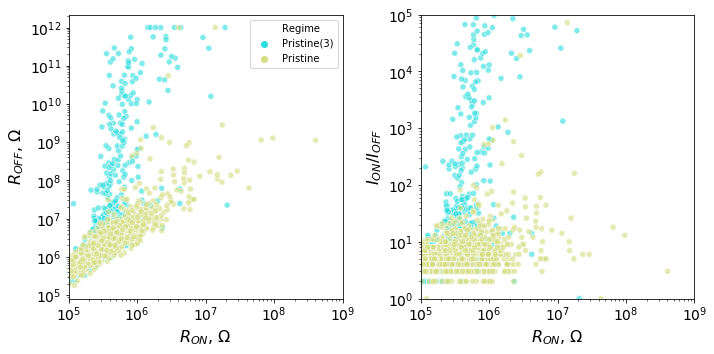

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# k = ['R open', 'R closed', 'On/off', 'Max mobility']
k = ['R_on', 'R_off', 'On/off']

ylabels = ['$R_{OFF}$, $\Omega$', '$I_{ON}/I_{OFF}$', '$Peak$ $mobility$, $cm^{2}V^{-1}s^{-1}$']

for i in range(2):

    sns.scatterplot(x = 'R_on', y = k[i + 1], data = data[data['R_on'] > 10e4][pd.Series(map(needed_shit, data['Regime']))],
                    hue = 'Regime', palette = 'rainbow', 
                    ax = ax[i], hue_norm = mpl.colors.LogNorm(), alpha = 0.6, legend = 'full')
    
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].legend()
    ax[i].set_xticks([1e5, 1e6, 1e7, 1e8, 1e9])
    ax[i].set_xlim(left = 1e5, right = 1e9)
    
    ax[i].tick_params(axis='both', which='both', labelsize=14)
    ax[i].set_xlabel('$R_{ON}$, $\Omega$', fontsize = 16)
    ax[i].set_ylabel(ylabels[i], fontsize = 16)

ax[1].get_legend().remove()
ax[1].set_ylim(bottom = 1e0, top = 1e5)
    
plt.tight_layout(pad = 1)
plt.savefig('N2O regimes.png', format = 'png', dpi = 600, bbox_inches = 'tight')

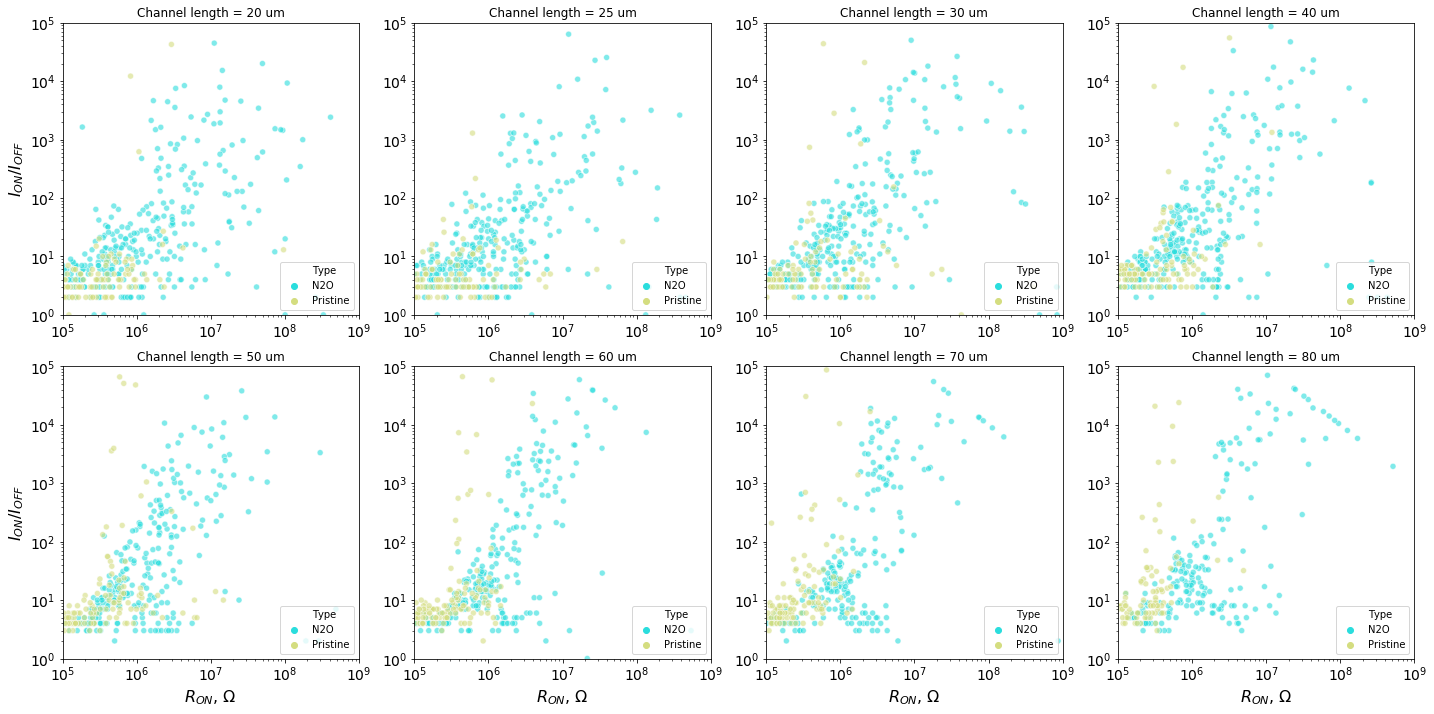

In [41]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

lch = [20, 25, 30, 40, 50, 60, 70, 80]

for i in range(8):

    sns.scatterplot(x = 'R_on', y = 'On/off', 
                    data = data[data['R_on'] > 10e4][data['Lch'] == lch[i]], 
                    hue = 'Type', palette = 'rainbow', 
                    ax = ax[i//4, i%4], hue_norm = mpl.colors.LogNorm(), alpha = 0.6, legend = 'full')
    
    ax[i//4, i%4].set_xscale('log')
    ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].legend()
    ax[i//4, i%4].set_xticks([1e5, 1e6, 1e7, 1e8, 1e9])
    ax[i//4, i%4].set_xlim(left = 1e5, right = 1e9)
    ax[i//4, i%4].set_ylim(bottom = 1e0, top = 1e5)
    
    ax[i//4, i%4].tick_params(axis='both', which='both', labelsize=14)
    ax[i//4, i%4].set_title('Channel length = {} um'.format(lch[i]))
    ax[i//4, i%4].legend(loc = 'lower right')

    
for i in range(4):
    
    ax[0, i].set_xlabel('', fontsize = 16)
    ax[1, i].set_xlabel('$R_{ON}$, $\Omega$', fontsize = 16)
    ax[0, i].set_ylabel('', fontsize = 16)
    ax[1, i].set_ylabel('', fontsize = 16)
    
    
ax[0, 0].set_ylabel('$I_{ON}/I_{OFF}$', fontsize = 16)
ax[1, 0].set_ylabel('$I_{ON}/I_{OFF}$', fontsize = 16)

# ax[1].get_legend().remove()
# ax[1].set_ylim(bottom = 1e0, top = 1e5)
    
plt.tight_layout(pad = 1)
plt.savefig('Onoff(Ron) N2O vs pristine different lch.png', format = 'png', dpi = 600, bbox_inches = 'tight')

In [10]:
data[data['CNT type'] == 'N2O'][data['On/off'] > 10 ** 5]

,Chip name,Measurement,Status,Bias,Lch,R open,R closed,On/off,Max mobility,CNT type,R
810,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,210.0,8.750750e+05,3.000000e+11,244877.0,131.202,N2O,100.0
811,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,270.0,5.789689e+05,3.000000e+11,287868.0,105.997,N2O,100.0
813,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,150.0,6.688340e+05,9.259259e+10,138439.0,82.322,N2O,100.0
814,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,270.0,6.115828e+05,3.000000e+11,272517.0,101.669,N2O,100.0
817,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,210.0,5.704579e+05,3.000000e+11,375638.0,104.630,N2O,100.0
818,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,270.0,6.039061e+05,3.000000e+11,275981.0,100.581,N2O,100.0
819,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,210.0,5.441750e+05,3.000000e+11,393781.0,121.085,N2O,100.0
820,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,270.0,6.910956e+05,3.000000e+11,241163.0,98.161,N2O,100.0
821,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,150.0,3.678760e+05,3.000000e+11,815492.0,144.720,N2O,100.0
822,"18.12.19_N2O(15%, 600C)_2.2lpm(0.03CO2)_300sec...",1st measurement,Operable,0.3,210.0,8.994307e+05,3.000000e+11,238246.0,59.951,N2O,100.0


In [56]:
from sklearn import *

model = svm.SVC(kernel = 'poly', C = 100)
y = data['CNT type'].map({'Pristine' : 0, 'N2O' : 1})

clf = model.fit(np.log10(data[['R open', 'On/off']]), y)

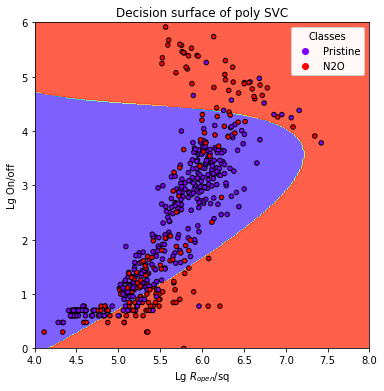

In [57]:
def make_meshgrid(x, y, h = 0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    
    return out

fig, ax = plt.subplots(figsize = (6, 6))
# title for the plots
title = ('Decision surface of poly SVC')
# Set-up grid for plotting.
X0, X1 = np.log10(data['R open']), np.log10(data['On/off'])
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.rainbow, alpha=0.8)

# patches = [mpl.patches.Circle(xy = (0,0),color='gray'),
#            mpl.patches.Circle(xy = (0,0),color='black')]

k = ax.scatter(X0, X1, c = y, cmap=plt.cm.rainbow, s=20, edgecolors='k')

a = (k.legend_elements()[0], ['Pristine', 'N2O'])

ax.set_ylabel('Lg On/off')
ax.set_xlabel('Lg $R_{open}$/sq')
ax.set_xlim(left = 4, right = 8)
ax.set_ylim(bottom = 0, top = 6)
ax.set_title(title)
# ax.legend(labels = ('Pristine', 'N2O'), handles = patches)

legend1 = ax.legend(*a, title="Classes")
ax.add_artist(legend1)

plt.show()
fig.savefig('Decision.png', dpi = 300, bbox_inches = 'tight')

In [58]:
clf.score(np.log10(data[['R open', 'On/off']]), y)

0.7712177121771218

In [64]:
metrics.roc_auc_score(y, clf.predict(np.log10(data[['R open', 'On/off']])))

0.6987332112332113

In [63]:
clf.predict(np.log10(data[['R open', 'On/off']]))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [59]:
len(data['R open'][data['CNT type'] == 'Pristine'])/len(data['R open'])

0.6642066420664207

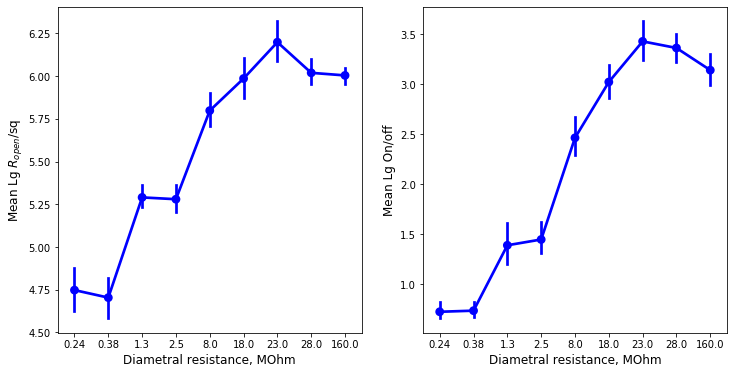

In [150]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.pointplot(x = data1['R'], y = np.log10(data1['R open']), data = data1, ax = ax[0], color = 'blue')
sns.pointplot(x = data1['R'], y = np.log10(data1['On/off']), data = data1, ax = ax[1], color = 'blue')

# sns.pointplot(x = data2['R'][data2['R'] != 65], y = np.log10(data2['R open'][data2['R'] != 65]), data = data2, ax = ax[1], palette = 'husl')

# ax[i].yaxis.set_ticks_position('none') 
# ax[i].axes.get_yaxis().set_visible(False)

ax[0].set_xlabel('Diametral resistance, MOhm', fontsize = 12)
ax[1].set_xlabel('Diametral resistance, MOhm', fontsize = 12)

ax[0].set_ylabel('Mean Lg $R_{open}$/sq', fontsize = 12)
ax[1].set_ylabel('Mean Lg On/off', fontsize = 12)

ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[1].tick_params(axis='both', which='major', labelsize=10)

fig.savefig('Mean on-off pristine.png', format = 'png', bbox_inches = 'tight', dpi = 300)

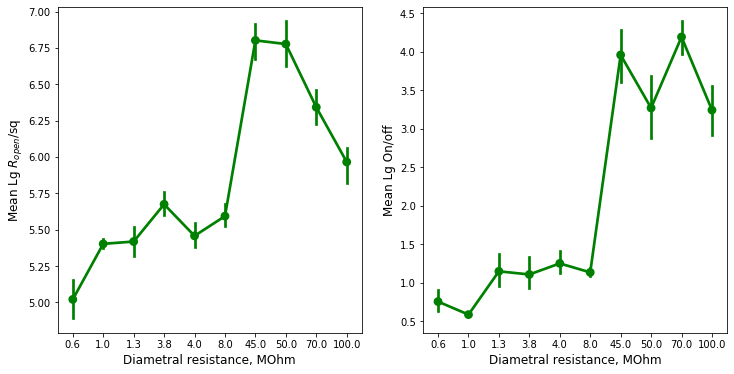

In [151]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.pointplot(x = data2['R'][data['R'] != 65], y = np.log10(data2['R open'][data['R'] != 65]), data = data2, ax = ax[0], color = 'green')
sns.pointplot(x = data2['R'][data['R'] != 65], y = np.log10(data2['On/off'][data['R'] != 65]), data = data2, ax = ax[1], color = 'green')

# sns.pointplot(x = data2['R'][data2['R'] != 65], y = np.log10(data2['R open'][data2['R'] != 65]), data = data2, ax = ax[1], palette = 'husl')

# ax[i].yaxis.set_ticks_position('none') 
# ax[i].axes.get_yaxis().set_visible(False)

ax[0].set_xlabel('Diametral resistance, MOhm', fontsize = 12)
ax[1].set_xlabel('Diametral resistance, MOhm', fontsize = 12)

ax[0].set_ylabel('Mean Lg $R_{open}$/sq', fontsize = 12)
ax[1].set_ylabel('Mean Lg On/off', fontsize = 12)

ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[1].tick_params(axis='both', which='major', labelsize=10)

fig.savefig('Mean on-off N2O.png', format = 'png', bbox_inches = 'tight', dpi = 300)

In [99]:
import math

1 - math.exp(-3)*(3**0/1 + 3**1/1 + 3**2/2 + 3**3/6 + 3**4/24)

0.18473675547622792

NameError: name 'reduce' is not defined

In [19]:
pd.Series(map(needed_shit, data['Regime']))

0        True
1        True
2        True
3        True
4        True
        ...  
6266    False
6267    False
6268    False
6269    False
6270    False
Length: 6271, dtype: bool